# Extractive Summarisation (Class Based)

Populating the interactive namespace from numpy and matplotlib
cnn_new


/home/meer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in double_scalars


 The apparent ease with which the militants breached barriers at El Adde has surprised many security analysts -- especially since the same style of assault had been seen before in bloody attacks on AMISOM forces

 That figure would make what happened at El Adde Kenya's largest military defeat since its independence in 1963

 On the day of the attack the Kenyan Defense Force (KDF) first said its soldiers were helping to repel an attack on a Somali National Army base before stating that the KDF had incurred unspecified losses

 He had a permanent smile 

################################################################################################################
 He had a permanent smile 

 The apparent ease with which the militants breached barriers at El Adde has surprised many security analysts -- especially since the same style of assault had been seen before in bloody attacks on AMISOM forces

 The apparent ease with which the militants breached barriers at El Adde has surprised 

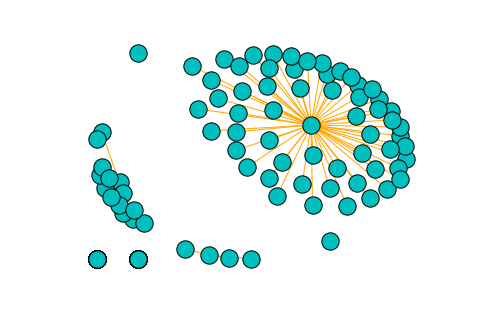

In [13]:
## Importing the required Libraries
from nltk.corpus import stopwords
import networkx as nx
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
from collections import Counter
import re

%pylab inline
## Class Based model for extractive summarisation
class Extractive(object):
    def __init__(self,document):
        self.document = document
    def __str__(self):
        return self.document
    def sentence_score(self):
        dic,count,tf = dict(),0,dict()
        with open(self.document,"r") as text:
            for line in text:
                for word in line.split(' '):
                    word = word.strip()
                    if word not in stopwords.words('english'):
                        count = count + 1
                        try:
                            dic[word] += 1
                        except:
                            dic[word] = 1
        for key in dic:
            dic[key] = float(dic[key])/count 
        with open(self.document,"r") as text:
            for line in text:
                score = 0
                for word in line.split(' '):
                    word = word.strip()
                    if word not in stopwords.words('english'):
                        score = score + dic[word]
                tf[line] = score
        return tf
    def statistical(self,sen1, sen2):
        count1 = Counter(w.lower() for w in re.findall(r"\w+", sen1))
        count2 = Counter(w.lower() for w in re.findall(r"\w+", sen2))
        intxn = set(count1.keys()) & set(count2.keys())
        num = sum([count1[x] * count2[x] for x in intxn])
        mod1 = sum([count1[x]**2 for x in count1.keys()])
        mod2 = sum([count2[x]**2 for x in count2.keys()])
        den = sqrt(mod1)*sqrt(mod2)
        return float(num)/den
    def semantic_score(self,word1, word2):
        try:
            w1 = wn.synset('%s.n.01'%(word1))
            w2 = wn.synset('%s.n.01'%(word2))
            return wn.path_similarity(w1,w2,simulate_root = False)
        except:
            return 0
    ## What should be the method to normalize these scores?
    ##  I divided the result by total number of comparisons.
    def sentence_semantic(self,string1, string2):
        score,count = 0,0
        token1 = nltk.word_tokenize(string1)
        token2 = nltk.word_tokenize(string2)
        for t1 in nltk.pos_tag(token1):
            for t2 in nltk.pos_tag(token2):
                if(t1[1].startswith('NN') and t2[1].startswith('NN')):
                    score += self.semantic_score(t1[0],t2[0])
                    count += 1
        try:
            return score.count
        except:
            return 0
    def construct_graph(self):
        G = nx.Graph()
        with open(self.document,"r") as text:
            for line in text:
                G.add_node(line)
        for nodei in G.nodes():
            for nodej in G.nodes():
                if nodei != nodej:
                    weight_of_edge = (1 - self.statistical(nodei,nodej) + self.sentence_semantic(nodei,nodej))
                    if not isnan(weight_of_edge):
                        G.add_edge(nodei,nodej,weight = weight_of_edge,color = 'blue',label = 'stat')
 
        
        return G
    def main_vertex(self,tf):
        max_val = max(tf.values())
        for i in tf:
            if tf[i] == max_val:
                main_vertex = i
        return main_vertex,max_val
    def leader_vertices(self,tf,threshold,max_val):
        lead = []
        for i in tf:
            if tf[i] >= ((float(threshold)/100) * max_val):
                lead.append(i)
        return lead
    def shortest_path(self,G,lead):
        shortest = dict()
        for i in G.nodes():
            shortest[i] = dict()
            for j in lead:
                try:
                    shortest[i][j] = (nx.dijkstra_path_length(G,i,j))
                except:
                    shortest[i][j] = 10000
        return shortest
    def nearest_leader(self,shortest):
        cluster = dict()
        for i in shortest:
            m = min(shortest[i],key = shortest[i].get)
            cluster[i] = m
        return cluster
    def make_clusters(self,G,cluster):
        K = G.copy()
        for nodei,nodej in K.edges():
            if cluster[nodei] != nodej and cluster[nodej] != nodei:
                K.remove_edge(nodei,nodej)
        nx.draw(K, node_color = 'c', edge_color = 'orange')
        nx.draw_spectral(K, node_color = 'c', edge_color = 'orange')
        return K
################################################################################################################  
doc = Extractive('cnn_new')
print doc
tf = doc.sentence_score()
doc.statistical("Hello my name is yasir","Hello my name is yasir")
doc.sentence_semantic("My name is Yasir","My name is Najeeb")
G = doc.construct_graph()
main_vertex,max_val = doc.main_vertex(tf)
leader = doc.leader_vertices(tf,75,max_val)
for i in leader:
    print i
print "################################################################################################################"
shortest = doc.shortest_path(G,leader)
cluster = doc.nearest_leader(shortest)
#for i in cluster:
    #print cluster[i]
K = doc.make_clusters(G,cluster)
################################################################################################################

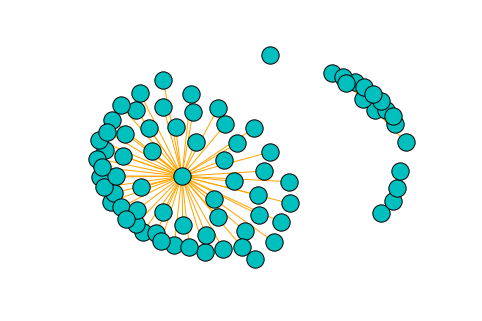

In [11]:
doc.make_clusters(G, cluster)

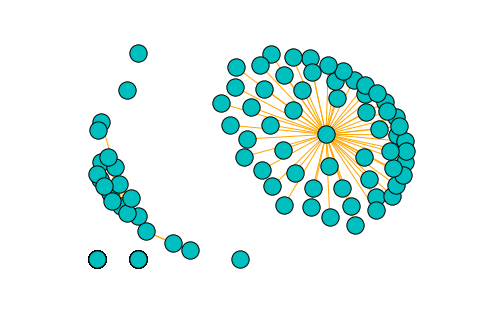

In [14]:
doc.make_clusters(G, cluster)

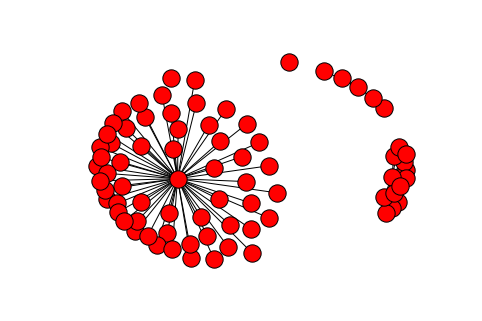

In [15]:
nx.draw(K)